<a href="https://colab.research.google.com/github/JonasSouza871/Estatistica_python/blob/main/Testes_de_Hip%C3%B3teses.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Teste de normalidade e as etapas de um teste

--------------

## 1.1. Ambiente e conhecendo os dataset

------------------------

-  Inclusão das bibliotes necessárias.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm #modelagem estatística e econométrica. Ela fornece ferramentas
#para realizar regressões (lineares, logísticas, etc.),
#testes estatísticos, análise de séries temporais
# é mais avançada que o scipy.stats

In [ ]:
#Mesmo dataset dos outros cursos
df = pd.read_csv('dados.csv')
df.head(10)
# uf, sexo, idade, cor , anos de estudo, renda e altura.

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631
5,11,1,34,8,12,790,1.637906
6,11,0,57,8,12,3150,1.570078
7,11,1,60,8,12,1700,1.608495
8,11,1,50,4,14,1800,1.780329
9,11,0,26,8,12,1150,1.793203


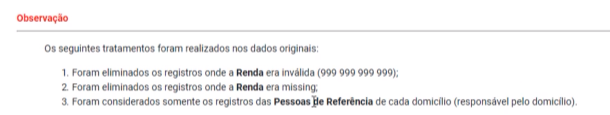

## 1.2. Testes de normalidade
-------------------------------

- Para saber se cada variavel possuem uma distribuição normal ou não.

In [ ]:
#Função para isso:
from scipy.stats import normaltest

<Axes: >

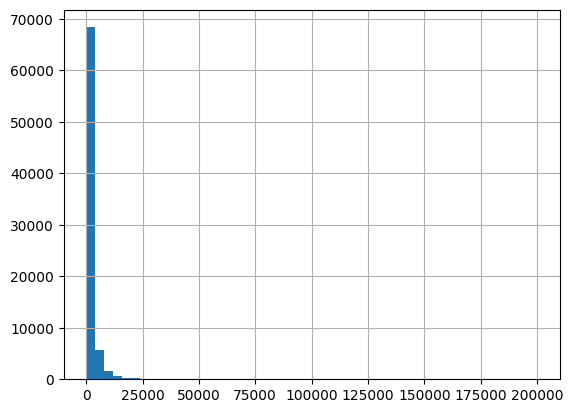

In [ ]:
# teste para renda
df.Renda.hist(bins=50)

-  Visualmente vemos que não se parece muito com uma distribuição normal

- Para fazer o teste:

In [ ]:
significancia = 0.05 #significancia de 5%
teste_hipotese_normal = normaltest(df.Renda)
print(teste_hipotese_normal)

NormaltestResult(statistic=np.float64(152380.75803960307), pvalue=np.float64(0.0))


In [ ]:
start_valor, p_valor = teste_hipotese_normal = normaltest(df.Renda)
# se p_valor for menor que a significancia é descartada a hipotese de distribuição normal
p_valor < significancia


np.True_

- Como é verdade, logo descartamos renda como distribuição normal.

- Para altura agora mantendo a mesma significancia

<Axes: >

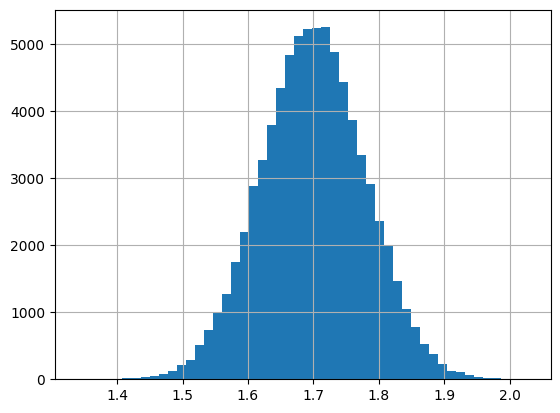

In [ ]:
df.Altura.hist(bins=50)

- O grafico se asemelha muito a uma distribuição normal.

In [ ]:
start_valor, p_valor = normaltest(df.Altura)
print(p_valor)
p_valor < significancia

0.9049591541967501


np.False_

- Falso, logo a hipostese é verdadeira, e se trata sim de uma distribuição NORMAL.

## 1.3. Etapas básicas de um teste:
-----------

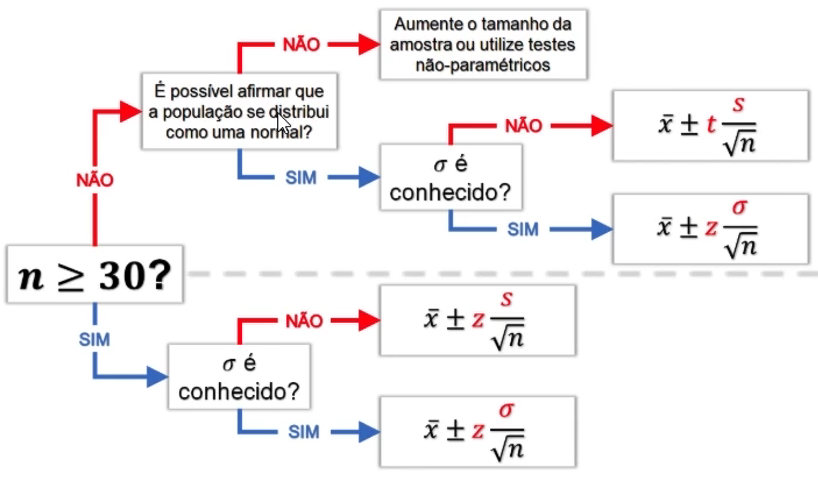

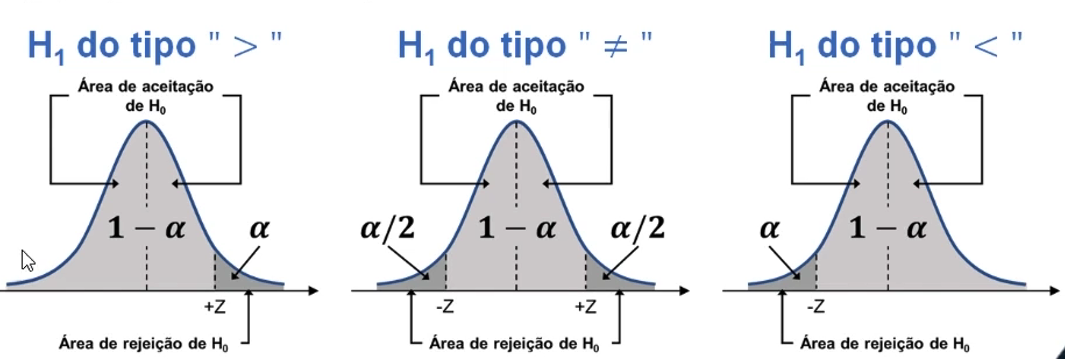

# 2. Teste bicaudal e entendendo p_valor

---------------------

## 2.1. Teste bicaudal

--------------

In [ ]:
amostra = [509, 505, 495, 510, 496, 509, 497, 502, 503, 505,
           501, 505, 510, 505, 504, 497, 506, 506, 508, 505,
           497, 504, 500, 498, 506, 496, 508, 497, 503, 501,
           503, 506, 499, 498, 509, 507, 503, 499, 509, 495,
           502, 505, 504, 509, 508, 501, 505, 497, 508, 507]

In [ ]:
# criando o dataframe para amostra
import pandas as pd
df_amostra = pd.DataFrame(amostra, columns=['amostra'])
df_amostra.head(10)

,amostra
0,509
1,505
2,495
3,510
4,496
5,509
6,497
7,502
8,503
9,505


In [ ]:
media_amostra = df_amostra.mean() #media das amostras igual ao valor dado na questao
print(media_amostra)

amostra    503.24
dtype: float64


In [ ]:
#para achar o desvio padrao da amostra
desvio_padrao_amostra = df_amostra.std()
print(desvio_padrao_amostra)

amostra    4.483803
dtype: float64


In [ ]:
# valores achado e dados na questao
media  = 500
significancia = 0.05
confianca = 1 - significancia
n = 50 #numero de amostras

In [ ]:
#achar o Z agora
from scipy.stats import norm
Probabilizade_z = confianca + (significancia/2)
print(Probabilizade_z)
z = norm.ppf(0.975)
print(z)

0.975
1.959963984540054


- Achar a area de rejeição

In [ ]:
# z_t = ( media_amostra - mediia ) /(desvio_padrao_amostra/ sqrt(n))
media_amostral = 503.24 #calculado acima
z_t = (media_amostral - media)/(desvio_padrao_amostra/np.sqrt(n))
print(z_t)

amostra    5.10956
dtype: float64


- fazendo o teste bicaudal

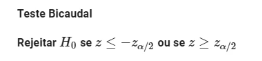

In [ ]:
# rejeitar se um dos casos acima acontecer. vamos testar os dosi
print(z_t <= -z/2 )
print(z_t >= z/2)

amostra    False
dtype: bool
amostra    True
dtype: bool


- nesse caso rejeitamos H0, e aceita que a media amostral(503.24) é significamente maior que 500 ml. rejeitamos h0 e devemos tomar providencias para ajustar o maquinario.

## 2.2. Critério do p_valor

-----------------------

In [ ]:
z_t = 5.11
probabilidade_z_t = norm.cdf(z_t)
print(probabilidade_z_t )

0.9999998389205939


In [ ]:
#achando o p_valor:-

p_valor = 2* (1-probabilidade_z_t)
print(p_valor)

3.221588122936936e-07


In [ ]:
# Critério do p_valor:
p_valor <= significancia
# se for true não é dist normal e H0 é rejeitado
# se for false é dist normal e h0 é acieto
print(p_valor <= significancia)

True


- O valor de true faz com H0 seja rejeitado, logo colabora com o resultado achado na ultimo teste.

- VIA BILIOTECAS:

In [ ]:
from statsmodels.stats.weightstats import ztest

In [ ]:
ztest(x1 = amostra, value = media)

(np.float64(5.109559775991873), np.float64(3.229103172445771e-07))

- outra forma via codigo:

# 3. Distribuição t de student e o teste unicaudal


-----------------------

## 3.1. Teste unicaudal

-----------------------

In [ ]:
# Importa as bibliotecas necessárias
import pandas as pd
from scipy.stats import t as t_student

# Cria um DataFrame vazio com os índices e colunas iniciais
# O índice vai de 1 a 30 (representando os graus de liberdade)
# As colunas vão de 0.10 a 0.00, diminuindo em 0.01
tabela_t_student = pd.DataFrame(
    [],
    index=[i for i in range(1, 31)],
    columns = [i / 100 for i in range(10, 0, -1)]
)

# Preenche a tabela com os valores da distribuição t de Student
# Itera sobre cada célula da tabela
for index in tabela_t_student.index:
    for column in tabela_t_student.columns:
        # Calcula o valor t de Student (bicaudal) e o atribui à célula
        # A função ppf (Percent Point Function) é a inversa da cdf (Cumulative Distribution Function)
        tabela_t_student.loc[index, column] = t_student.ppf(1 - float(column) / 2, index)

# Cria um MultiIndex para as linhas para adicionar uma descrição
index = [('Graus de Liberdade (n - 1)', i) for i in range(1, 31)]
tabela_t_student.index = pd.MultiIndex.from_tuples(index)

# Cria um MultiIndex para as colunas para organizar os níveis de significância
# Formata os valores para exibição
columns = [("{0:0.3f}".format(i / 100), "{0:0.3f}".format((i / 100) / 2)) for i in range(10, 0, -1)]
tabela_t_student.columns = pd.MultiIndex.from_tuples(columns)

# Renomeia os eixos das colunas para 'Bicaudal' e 'Unicaudal'
tabela_t_student.rename_axis(['Bicaudal', 'Unicaudal'], axis=1, inplace = True)

# Exibe a tabela t-Student resultante
tabela_t_student


Bicaudal                          0.100     0.090     0.080     0.070  \
Unicaudal                         0.050     0.045     0.040     0.035   
Graus de Liberdade (n - 1) 1   6.313752  7.026366  7.915815  9.057887   
                           2   2.919986  3.103977  3.319764  3.578247   
                           3   2.353363  2.470807  2.605427  2.762599   
                           4   2.131847    2.2261  2.332873  2.455892   
                           5   2.015048  2.097837  2.190958  2.297392   
                           6    1.94318  2.019201  2.104306  2.201059   
                           7   1.894579  1.966153  2.046011  2.136453   
                           8   1.859548  1.927986  2.004152  2.090166   
                           9   1.833113  1.899222  1.972653  2.055395   
                           10  1.812461  1.876774  1.948099  2.028327   
                           11  1.795885  1.858772  1.928427  2.006663   
                           12  1.782288  1.844015  1.912313  1.988934   
                           13  1.770933    1.8317  1.898874  1.974158   
                           14   1.76131  1.821267  1.887496  1.961656   
                           15   1.75305  1.812316  1.877739   1.95094   
                           16  1.745884  1.804553  1.869279  1.941654   
                           17  1.739607  1.797755  1.861875   1.93353   
                           18  1.734064  1.791754   1.85534  1.926362   
                           19  1.729133  1.786417   1.84953  1.919992   
                           20  1.724718   1.78164  1.844331  1.914292   
                           21  1.720743  1.777339  1.839651  1.909164   
                           22  1.717144  1.773447  1.835417  1.904524   
                           23  1.713872  1.769907  1.831567  1.900307   
                           24  1.710882  1.766675  1.828051  1.896457   
                           25  1.708141  1.763711  1.824828  1.892928   
                           26  1.705618  1.760983  1.821863  1.889682   
                           27  1.703288  1.758466  1.819126  1.886686   
                           28  1.701131  1.756134  1.816592  1.883912   
                           29  1.699127  1.753968  1.814238  1.881336   
                           30  1.697261  1.751952  1.812047  1.878938   

Bicaudal                           0.060      0.050      0.040      0.030  \
Unicaudal                          0.030      0.025      0.020      0.015   
Graus de Liberdade (n - 1) 1   10.578895  12.706205  15.894545  21.204949   
                           2    3.896425   4.302653   4.848732   5.642778   
                           3     2.95051   3.182446   3.481909   3.896046   
                           4    2.600762   2.776445   2.998528    3.29763   
                           5    2.421585   2.570582   2.756509   3.002875   
                           6    2.313263   2.446912   2.612242   2.828928   
                           7    2.240879   2.364624   2.516752   2.714573   
                           8    2.189155   2.306004   2.448985   2.633814   
                           9    2.150375   2.262157   2.398441   2.573804   
                           10   2.120234   2.228139   2.359315   2.527484   
                           11   2.096139   2.200985    2.32814   2.490664   
                           12   2.076441   2.178813   2.302722     2.4607   
                           13   2.060038   2.160369   2.281604   2.435845   
                           14   2.046169   2.144787   2.263781   2.414898   
                           15   2.034289    2.13145    2.24854   2.397005   
                           16      2.024   2.119905   2.235358   2.381545   
                           17   2.015002   2.109816   2.223845   2.368055   
                           18   2.007067   2.100922   2.213703    2.35618   
                           19   2.000017   2.093024   2.204701   2.345648   
                           20   1.993713   2.0

# 3.2 Teste Unicaudal

--------

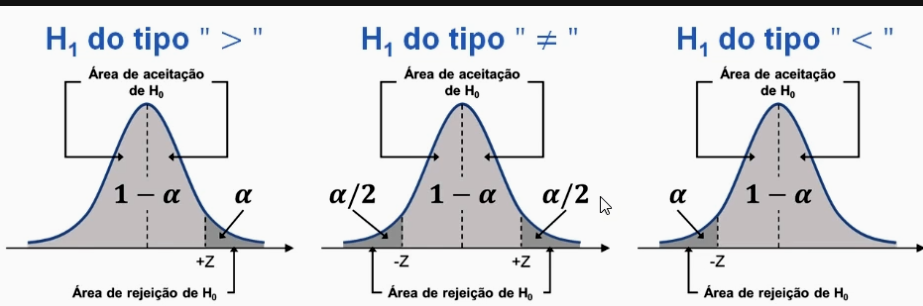

- Agora vamos fazer o teste unicauddal para 25 latas de refregirentantes selecionadas ao aleatorio.
- A hipotese diz que tem mais de 37g de açucar

In [ ]:
amostra = [37.27, 36.42, 34.84, 34.60, 37.49,
           36.53, 35.49, 36.90, 34.52, 37.30,
           34.99, 36.55, 36.29, 36.06, 37.42,
           34.47, 36.70, 35.86, 36.80, 36.92,
           37.04, 36.39, 37.32, 36.64, 35.45]

In [ ]:
amostra = pd.DataFrame(amostra, columns=['Amostra'])
amostra

,Amostra
0,37.27
1,36.42
2,34.84
3,34.60
4,37.49
5,36.53
6,35.49
7,36.90
8,34.52
9,37.30


In [ ]:
media_amostra = amostra.mean()[0] #media
media_amostra

/tmp/ipython-input-2326124975.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  media_amostra = amostra.mean()[0] #media


np.float64(36.2504)

In [ ]:
desvio_padrao_amostra = amostra.std()[0]
desvio_padrao_amostra

/tmp/ipython-input-1718920650.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  desvio_padrao_amostra = amostra.std()[0]


np.float64(0.9667535018469453)

In [ ]:
#dados

media = 37
significancia = 0.05
confianca = 1 - significancia
n = 25
graus_de_liberdade = n - 1


In [ ]:
tabela_t_student[22:26]

Bicaudal                          0.100     0.090     0.080     0.070  \
Unicaudal                         0.050     0.045     0.040     0.035   
Graus de Liberdade (n - 1) 23  1.713872  1.769907  1.831567  1.900307   
                           24  1.710882  1.766675  1.828051  1.896457   
                           25  1.708141  1.763711  1.824828  1.892928   
                           26  1.705618  1.760983  1.821863  1.889682   

Bicaudal                          0.060     0.050     0.040     0.030  \
Unicaudal                         0.030     0.025     0.020     0.015   
Graus de Liberdade (n - 1) 23  1.978249  2.068658  2.176958  2.313231   
                           24  1.973994  2.063899  2.171545  2.306913   
                           25  1.970095  2.059539  2.166587   2.30113   
                           26  1.966509  2.055529  2.162029  2.295815   

Bicaudal                          0.020     0.010  
Unicaudal                         0.010     0.005  
Graus de Liberdade (n - 1) 23  2.499867  2.807336  
                           24  2.492159   2.79694  
                           25  2.485107  2.787436  
                           26   2.47863  2.778715

In [ ]:
t_rej  = t_student.ppf(confianca, graus_de_liberdade)
t_rej

np.float64(1.7108820799094275)

- Calculando o T de teste agora:

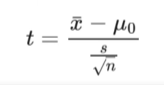

In [ ]:
t_teste = (media_amostra - media) / (desvio_padrao_amostra / np.sqrt(n))
print(t_teste)
#esse acima é o t teste e abaixo agora vamos testar ele.

-3.876893119952082


In [ ]:
# se t_teste >= a t_rej, deve-se rejetiar h0 (hipotese do fabricante <37g)
# e aceitar H1 (hipostese do consumidor > 37g)
t_teste >= t_rej
print(t_teste>= t_rej)

False


- Falso, logo H0 esta aceitado e H1 recusado, logo o fabricante está correto eo consumidor errado na hipotese.

- utilziando p_valor

In [ ]:
p_valor_unicaudal = 1 - norm.cdf(t_teste) #achara area de probabilidade do t_teste
p_valor_unicaudal

np.float64(0.9999471005973446)

- utilizando o criterio de p_valor:

In [ ]:
p_valor_unicaudal <= significancia

np.False_

- Falso, logo a hipotese que H0 é verdadeira e H1 está recusado, logo a hipotese da empresa está certa.

# 4.0 Teste para duas Amostras

-------------------------------

## 4.1 Teste para duas amostra

-----------------

- separa apenas os homens no dataset com 500 amostra e renda

In [ ]:
homens = df.query('Sexo == 0').sample(n=500, random_state=101).Renda

- separa mulheres e suas respectivas rtrendas em 500 amostras

In [ ]:
mulheres = df.query('Sexo == 1').sample(n=500, random_state=101).Renda

In [ ]:
media_amostra_Homen = homens.mean()
media_amostra_Homen

np.float64(2142.608)

In [ ]:
media_amostra_Mulher = mulheres.mean()
media_amostra_Mulher

np.float64(1357.528)

In [ ]:
desvio_padrao_homem = homens.std()
desvio_padrao_homem

2548.050802499875

In [ ]:
desvio_padrao_mulher = mulheres.std()
desvio_padrao_mulher

1569.9011907484578

In [ ]:
significancia = 0.01
numero_amostra_mulheres = 500
numero_amostra_homens = 500
confianca = 1 - significancia

In [ ]:
probabilizade_z_rej = confianca
z_rej = norm.ppf(probabilizade_z_rej)
z_rej

np.float64(2.3263478740408408)

- Para achar o z_teste

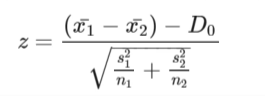

In [ ]:
D_0 = 0 # diferenca entre as media, como é teste de hipotese vamos considerar que é 0
numerador = (media_amostra_Homen - media_amostra_Mulher) - D_0
denominador = np.sqrt((desvio_padrao_homem ** 2 / numero_amostra_homens) + (desvio_padrao_mulher ** 2 / numero_amostra_mulheres))

z_teste = numerador/denominador
print(z_teste)

5.86562005776475


-  Fazendo o teste unicaudal:

- Se z_teste > z_rej, devemos rejeitas a hipotese 0, se não devemos aceitar.



In [ ]:
teste_unicaudal = z_teste > z_rej
print(teste_unicaudal)

True


- True, logo rejeitamos a hipotese de H0 ( Mulheres recebem mais que os homens)
e aceitamos a hipotese h1 (Homens recebem mais que as mulhereS)


## 4.2. Aplicando o p_valor

---------------------

In [ ]:
from statsmodels.stats.weightstats import DescrStatsW, CompareMeans

In [ ]:
teste_H = DescrStatsW(homens) # objeto homens
teste_M = DescrStatsW(mulheres) #objeto mulheres

In [ ]:
teste = teste_H.get_compare(teste_M)

In [ ]:
z_teste, p_valor = teste.ztest_ind(alternative='larger', value=0) #valores do z_teste e do p valor, igual achamos na mao
print(z_teste)
print(p_valor)

5.865620057764754
2.2372867859458255e-09


In [ ]:
teste_unicaudal = p_valor < significancia
print(teste_unicaudal) # logo rejeitamos

True


- logo reijatamos H0 pelo teste do p_ valor

- Fazendo o calculo com o z_teste:

In [ ]:
p_valor = 1 - norm.cdf(z_teste)
print(p_valor)

2.237286800266247e-09


In [ ]:
teste_unicaudal = p_valor < significancia
print(teste_unicaudal) # logo rejeitamos

True
